In [186]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as snb
from google.colab import files
import warnings
warnings.filterwarnings('ignore')

In [187]:
df=pd.read_csv("/content/StudentsPerformance.csv")

In [188]:
df.columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')

In [189]:
df.shape

(1000, 8)

In [190]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [191]:
for column in df.columns:
  if df[column].dtype == "O":
    print(f"{column} : {df[column].unique()}")

gender : ['female' 'male']
race/ethnicity : ['group B' 'group C' 'group A' 'group D' 'group E']
parental level of education : ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
lunch : ['standard' 'free/reduced']
test preparation course : ['none' 'completed']


In [192]:
df.isna().sum()

,0
gender,0
race/ethnicity,0
parental level of education,0
lunch,0
test preparation course,0
math score,0
reading score,0
writing score,0


In [193]:
df.duplicated().sum()

np.int64(0)

In [194]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [195]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [196]:
df["test preparation course"]=df["test preparation course"].map({
    'none':0,
    'completed':1
})

In [197]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   int64 
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(4), object(4)
memory usage: 62.6+ KB


In [198]:
df["lunch"]=df["lunch"].map({
    'free/reduced':0,
    'standard':1
})

In [199]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   int64 
 4   test preparation course      1000 non-null   int64 
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(5), object(3)
memory usage: 62.6+ KB


In [200]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,1,0,72,72,74
1,female,group C,some college,1,1,69,90,88
2,female,group B,master's degree,1,0,90,95,93
3,male,group A,associate's degree,0,0,47,57,44
4,male,group C,some college,1,0,76,78,75


In [201]:
education_order = {
    'some high school': 1,
    'high school': 2,
    "associate's degree": 3,
    'some college': 4,
    "bachelor's degree": 5,
    "master's degree": 6
}

In [202]:
df["parental level of education"]=df["parental level of education"].map(education_order)

In [203]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   int64 
 3   lunch                        1000 non-null   int64 
 4   test preparation course      1000 non-null   int64 
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(6), object(2)
memory usage: 62.6+ KB


In [204]:
df["race/ethnicity"].value_counts()

,count
race/ethnicity,
group C,319
group D,262
group B,190
group E,140
group A,89


In [205]:
df["race/ethnicity"].unique()

array(['group B', 'group C', 'group A', 'group D', 'group E'],
      dtype=object)

In [206]:
group_map={
    'group B':4,
    'group C':3,
    'group A':5,
    'group D':2,
    'group E':1
}

In [207]:
df["race/ethnicity"]=df["race/ethnicity"].map(group_map)

In [208]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   int64 
 2   parental level of education  1000 non-null   int64 
 3   lunch                        1000 non-null   int64 
 4   test preparation course      1000 non-null   int64 
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(7), object(1)
memory usage: 62.6+ KB


In [209]:
df.describe()

,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000
mean,2.826000,3.085000,0.645000,0.358000,66.08900,69.169000,68.054000
std,1.157179,1.461476,0.478753,0.479652,15.16308,14.600192,15.195657
min,1.000000,1.000000,0.000000,0.000000,0.00000,17.000000,10.000000
25%,2.000000,2.000000,0.000000,0.000000,57.00000,59.000000,57.750000
50%,3.000000,3.000000,1.000000,0.000000,66.00000,70.000000,69.000000
75%,4.000000,4.000000,1.000000,1.000000,77.00000,79.000000,79.000000
max,5.000000,6.000000,1.000000,1.000000,100.00000,100.000000,100.000000


In [210]:
df.nunique()

,0
gender,2
race/ethnicity,5
parental level of education,6
lunch,2
test preparation course,2
math score,81
reading score,72
writing score,77


In [211]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   int64 
 2   parental level of education  1000 non-null   int64 
 3   lunch                        1000 non-null   int64 
 4   test preparation course      1000 non-null   int64 
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(7), object(1)
memory usage: 62.6+ KB


In [212]:
cat_features=df.select_dtypes(include="O").columns
num_features=df.select_dtypes(exclude="O").columns

In [213]:
cat_features,num_features

(Index(['gender'], dtype='object'),
 Index(['race/ethnicity', 'parental level of education', 'lunch',
        'test preparation course', 'math score', 'reading score',
        'writing score'],
       dtype='object'))

In [214]:
print(f"categories ({len(cat_features)}) : {cat_features}")
print(f"numerical ({len(num_features)}) : {num_features}")

categories (1) : Index(['gender'], dtype='object')
numerical (7) : Index(['race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')


In [215]:
df["average score"]=(df['math score']+df['reading score']+df['writing score'])/3

In [216]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   gender                       1000 non-null   object 
 1   race/ethnicity               1000 non-null   int64  
 2   parental level of education  1000 non-null   int64  
 3   lunch                        1000 non-null   int64  
 4   test preparation course      1000 non-null   int64  
 5   math score                   1000 non-null   int64  
 6   reading score                1000 non-null   int64  
 7   writing score                1000 non-null   int64  
 8   average score                1000 non-null   float64
dtypes: float64(1), int64(7), object(1)
memory usage: 70.4+ KB


In [217]:
df["total score"]=df['math score']+df['reading score']+df['writing score']

In [218]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   gender                       1000 non-null   object 
 1   race/ethnicity               1000 non-null   int64  
 2   parental level of education  1000 non-null   int64  
 3   lunch                        1000 non-null   int64  
 4   test preparation course      1000 non-null   int64  
 5   math score                   1000 non-null   int64  
 6   reading score                1000 non-null   int64  
 7   writing score                1000 non-null   int64  
 8   average score                1000 non-null   float64
 9   total score                  1000 non-null   int64  
dtypes: float64(1), int64(8), object(1)
memory usage: 78.3+ KB


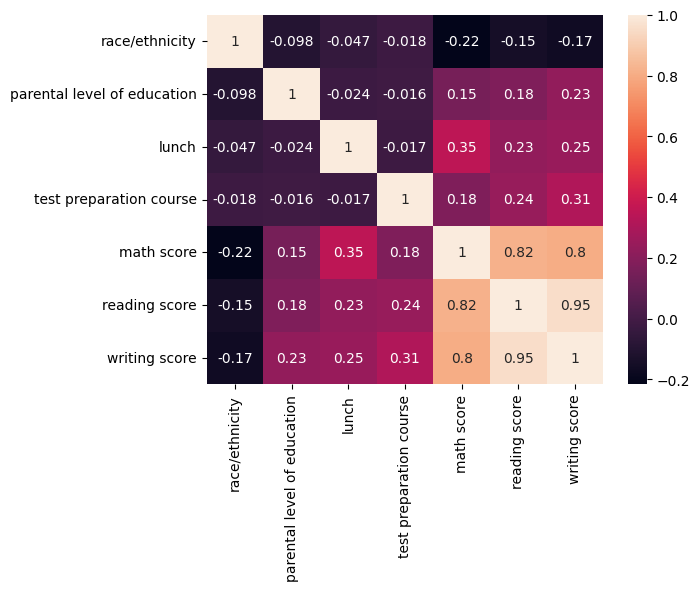

In [219]:
snb.heatmap(df[num_features].corr(),annot=True)
plt.show()

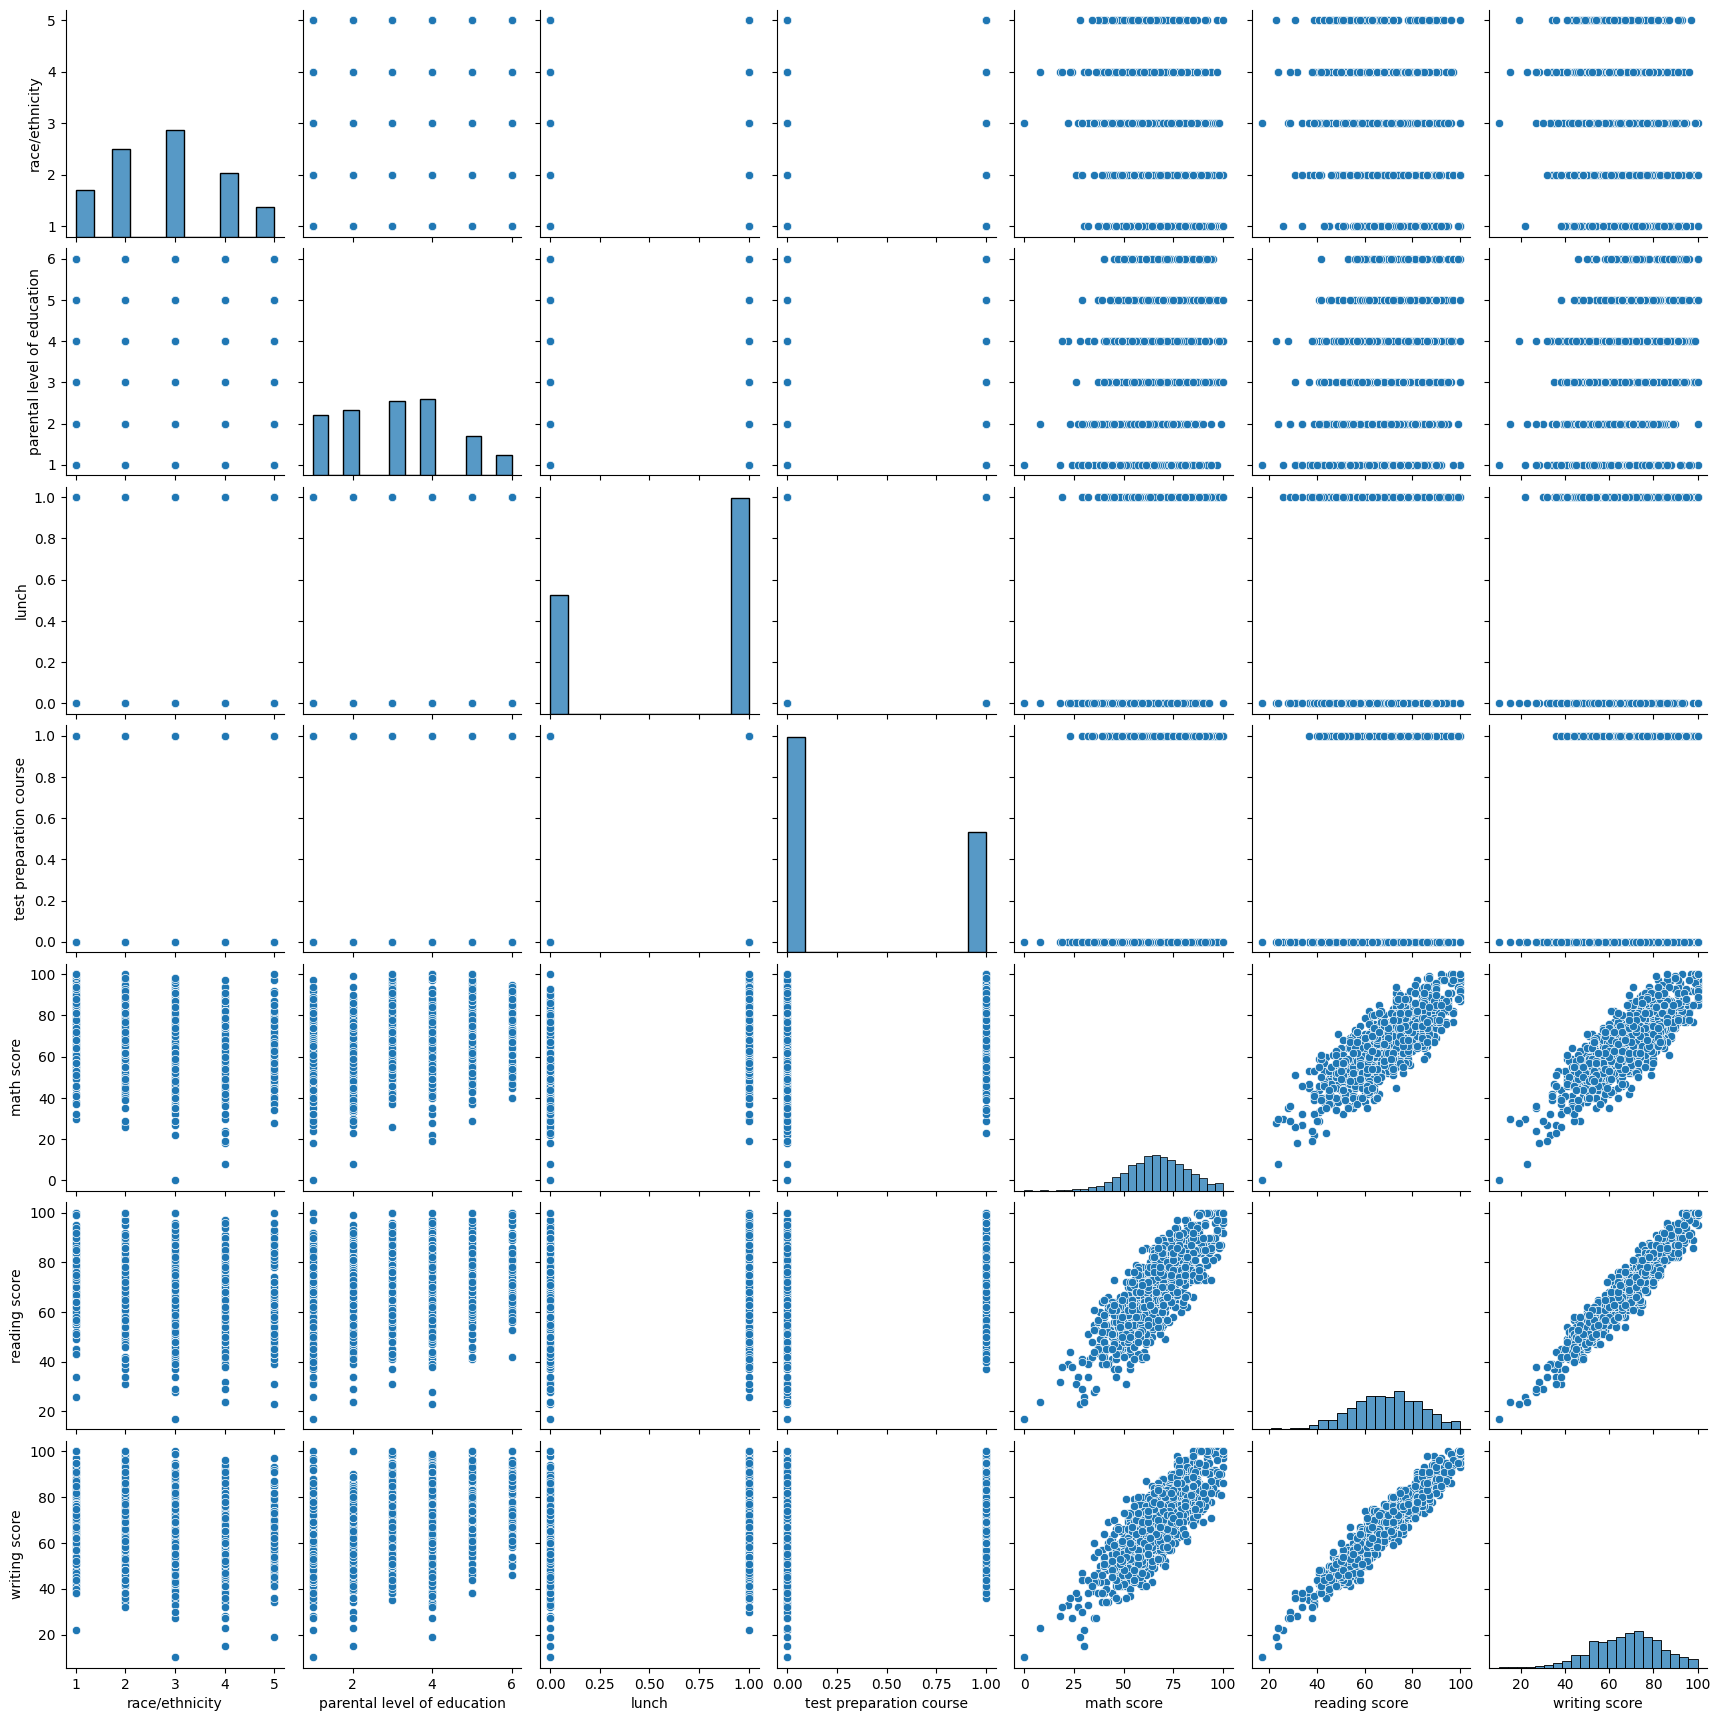

In [220]:
snb.pairplot(df[num_features])

<Axes: >

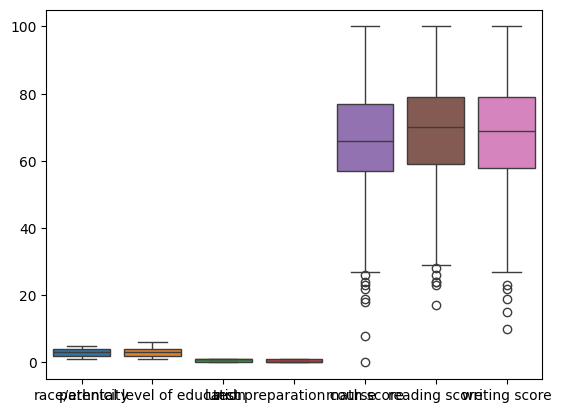

In [221]:
snb.boxplot(df[num_features])

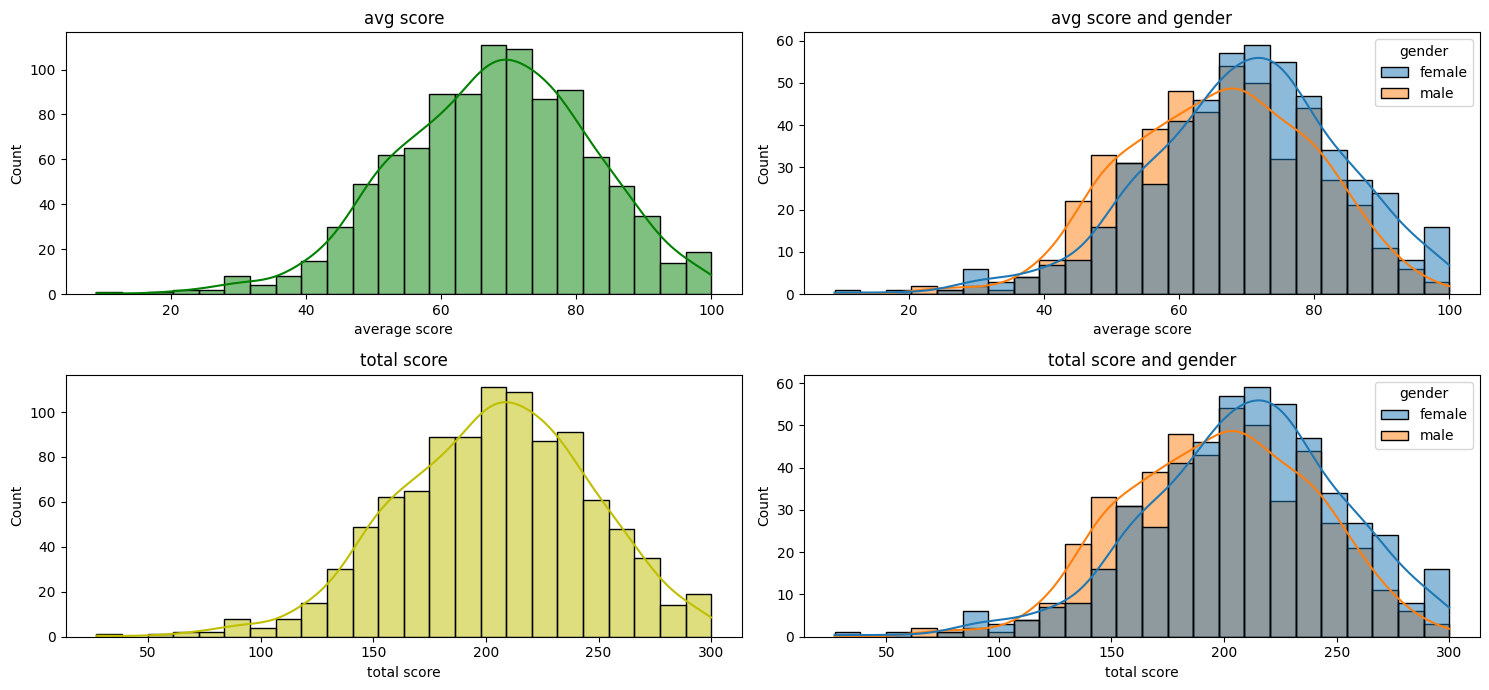

In [222]:
fig,axs=plt.subplots(2,2,figsize=(15,7))

snb.histplot(data=df,x="average score",kde=True,color="g",ax=axs[0,0])
axs[0,0].set_title("avg score")

snb.histplot(data=df,x="average score",kde=True,hue="gender",ax=axs[0,1])
axs[0,1].set_title("avg score and gender")

snb.histplot(data=df,x="total score",kde=True,color="y",ax=axs[1,0])
axs[1,0].set_title("total score")

snb.histplot(data=df,x="total score",kde=True,hue="gender",ax=axs[1,1])
axs[1,1].set_title("total score and gender")

plt.tight_layout()
plt.show()

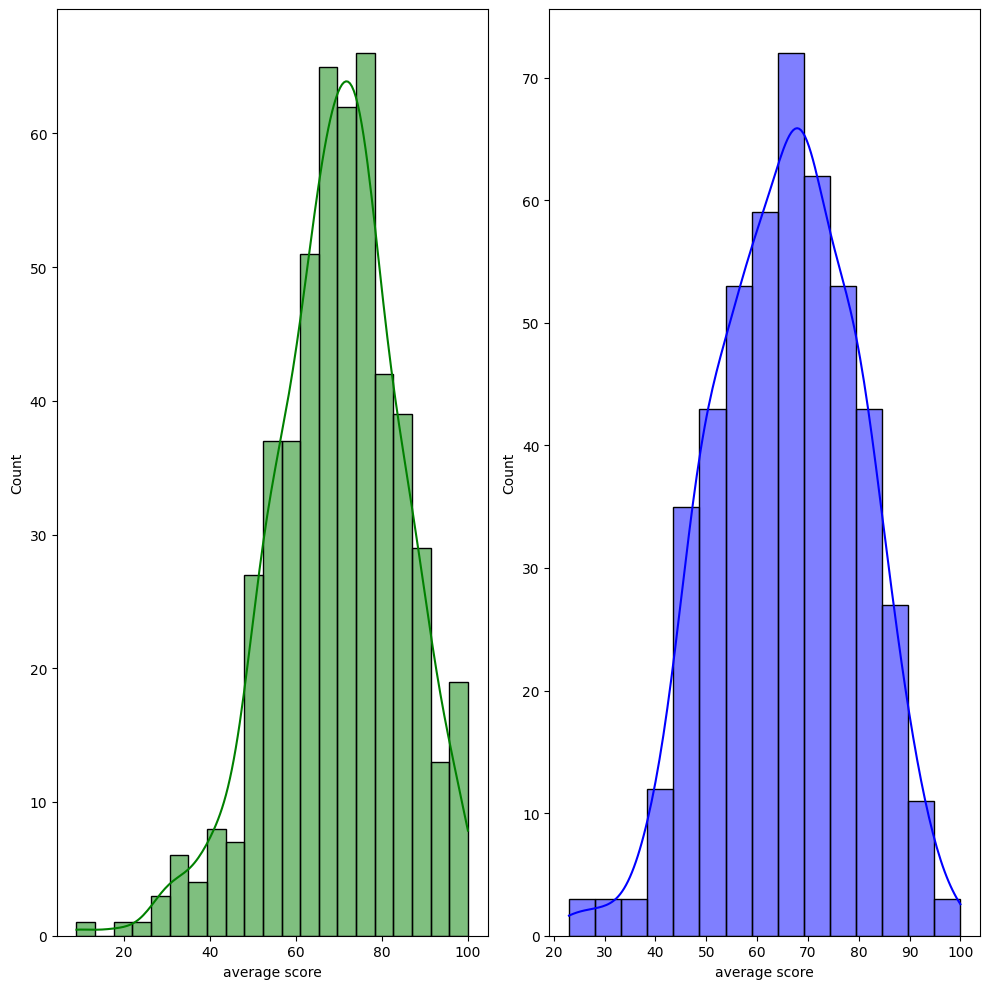

In [223]:
fig,axs=plt.subplots(1,2,figsize=(10,10))

snb.histplot(data=df[df["gender"]=="female"],x="average score",kde=True,color="g",ax=axs[0])
snb.histplot(data=df[df["gender"]=="male"],x="average score",kde=True,color="blue",ax=axs[1])

plt.tight_layout()
plt.show()

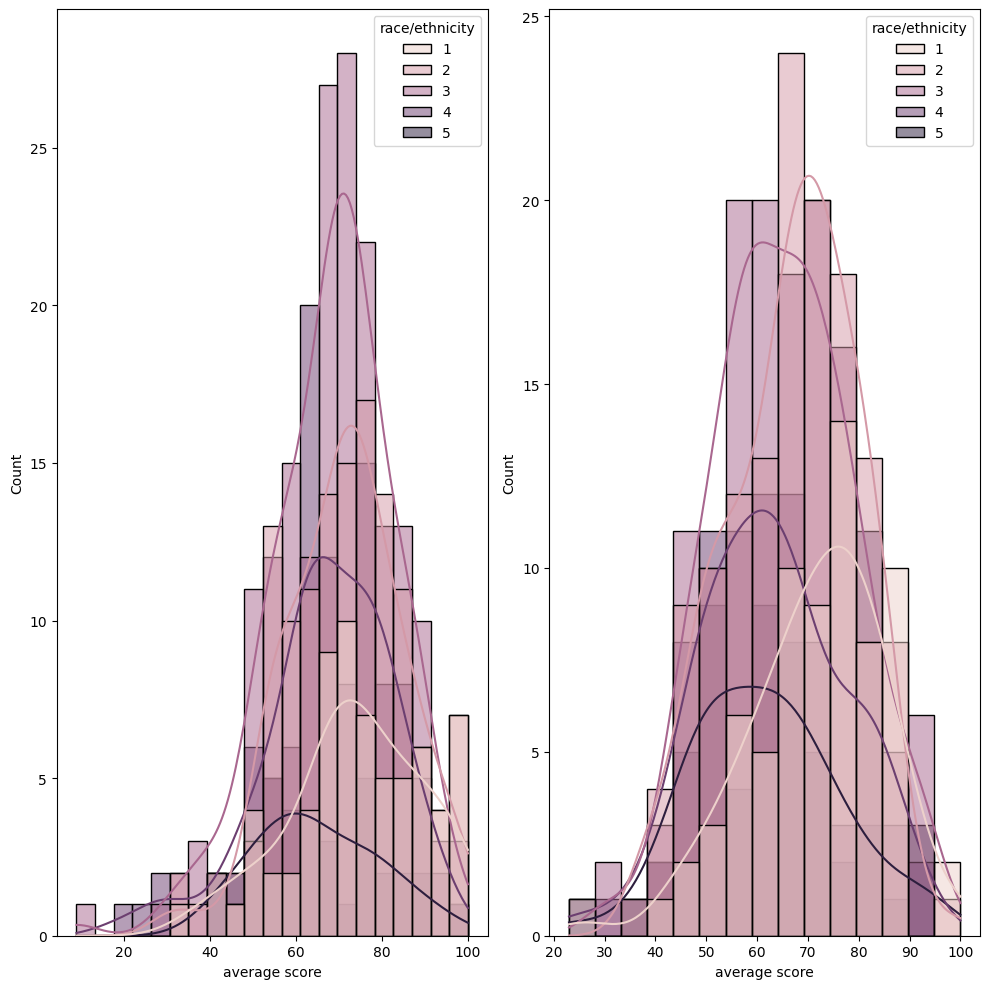

In [224]:
cmp="race/ethnicity"
fig,axs=plt.subplots(1,2,figsize=(10,10))
snb.histplot(data=df[df["gender"]=="female"],x="average score",kde=True,color="blue",hue=cmp,ax=axs[0])
snb.histplot(data=df[df["gender"]=="male"],x="average score",kde=True,hue=cmp,color="green",ax=axs[1])

plt.tight_layout()
plt.show()

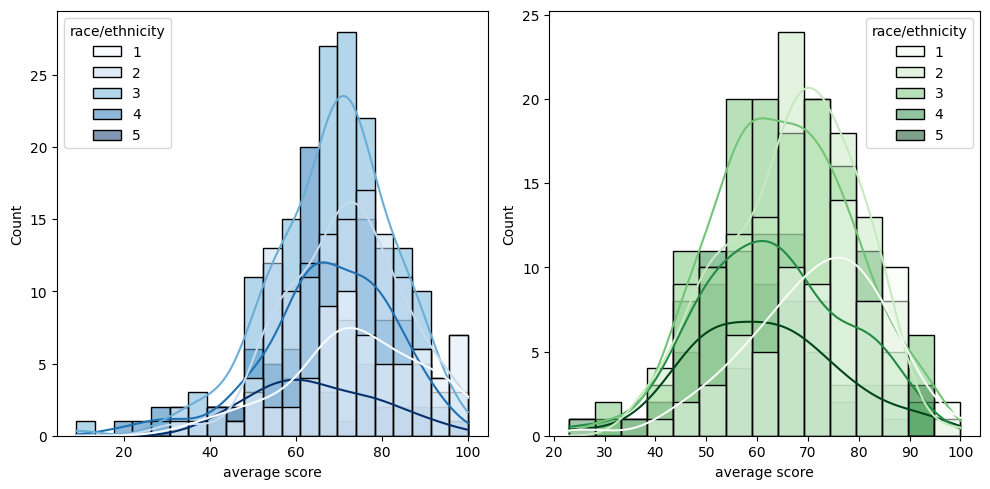

In [225]:
cmp = "race/ethnicity"
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

# For female subset, with hue and custom palette
snb.histplot(data=df[df["gender"] == "female"], x="average score", kde=True, hue=cmp, palette="Blues", ax=axs[0])

# For male subset, with hue and custom palette
snb.histplot(data=df[df["gender"] == "male"], x="average score", kde=True, hue=cmp, palette="Greens", ax=axs[1])

plt.tight_layout()
plt.show()

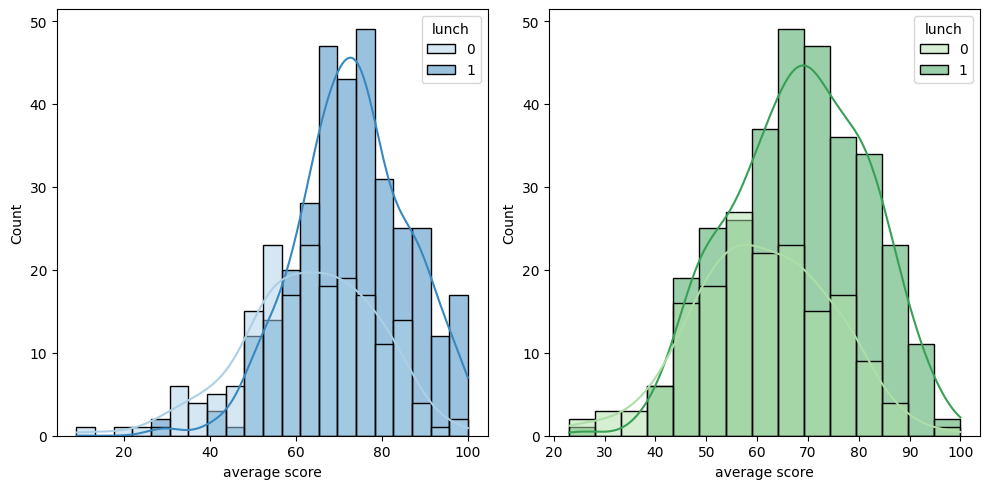

In [226]:
cmp = "lunch"
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

# For female subset, with hue and custom palette
snb.histplot(data=df[df["gender"] == "female"], x="average score", kde=True, hue=cmp, palette="Blues", ax=axs[0])

# For male subset, with hue and custom palette
snb.histplot(data=df[df["gender"] == "male"], x="average score", kde=True, hue=cmp, palette="Greens", ax=axs[1])

plt.tight_layout()
plt.show()

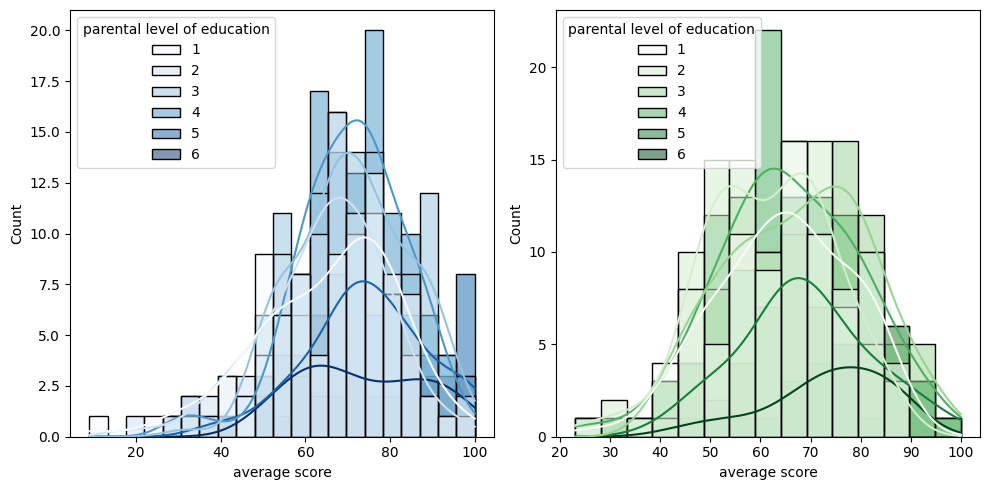

In [227]:
cmp = "parental level of education"
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

# For female subset, with hue and custom palette
snb.histplot(data=df[df["gender"] == "female"], x="average score", kde=True, hue=cmp, palette="Blues", ax=axs[0])

# For male subset, with hue and custom palette
snb.histplot(data=df[df["gender"] == "male"], x="average score", kde=True, hue=cmp, palette="Greens", ax=axs[1])

plt.tight_layout()
plt.show()

In [228]:
df.columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score', 'average score', 'total score'],
      dtype='object')

In [236]:
df1=pd.read_csv("/content/StudentsPerformance.csv")
cat_features=df1.select_dtypes(include="O").columns
num_features=df1.select_dtypes(exclude="O").columns

In [231]:
def fetch_data(stud_data,group_column="gender",score_column="total score"):
  # Group by the column and sum the total scores
  grouped_scores = stud_data.groupby(group_column)[score_column].sum()

  # If you want lists of labels and sums separately:
  col_labels = grouped_scores.index.tolist()
  col_data = grouped_scores.values.tolist()

  return col_labels,col_data

In [232]:
def plot_pie_chart(stud_data,cat_features,num_features):
  for cat_feature in cat_features:
    for num_feature in num_features:
      col_labels,col_data=fetch_data(stud_data,group_column=cat_feature,score_column=num_feature)

      plt.title(f"Sum of {num_feature} by {cat_feature}")
      plt.pie(x=col_data,labels=col_labels,autopct="%.2f%%")
      plt.show()

In [235]:
def plot_pie_chart_with_palette(stud_data, cat_features, num_features):
    for cat_feature in cat_features:
        for num_feature in num_features:
            col_labels, col_data = fetch_data(stud_data, group_column=cat_feature, score_column=num_feature)
            if len(col_data) == 0:
                continue

            plt.figure(figsize=(6,6))
            plt.title(f"Sum of {num_feature} by {cat_feature}")

            # Use seaborn color palette based on number of categories
            palette = snb.color_palette("Set2", len(col_labels))
            plt.pie(x=col_data, labels=col_labels, autopct="%.2f%%", colors=palette)
            plt.show()


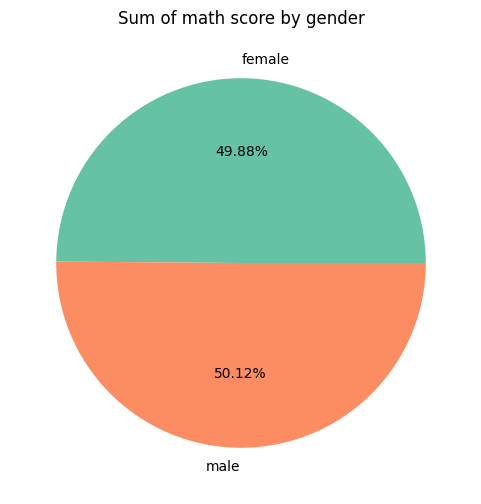

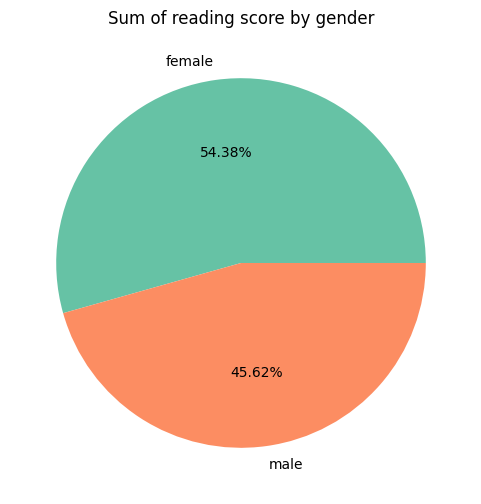

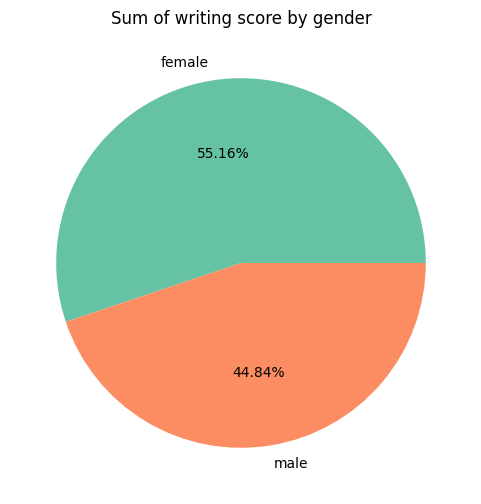

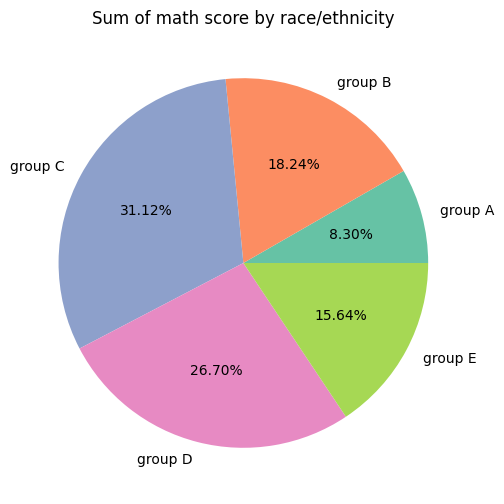

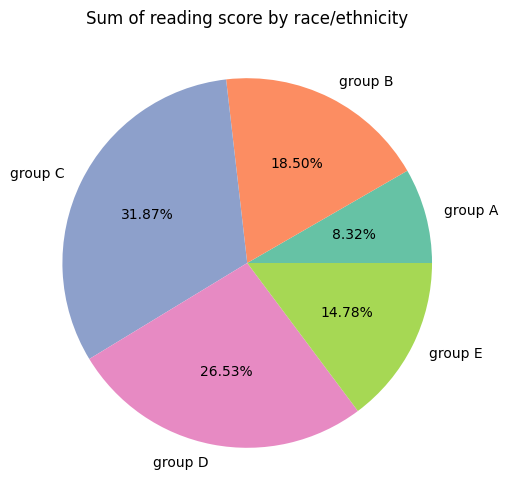

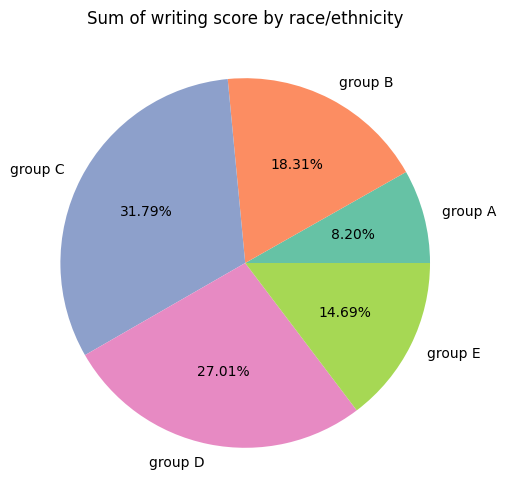

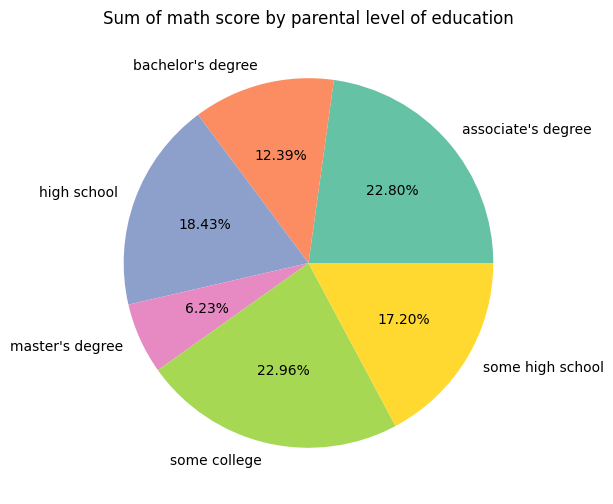

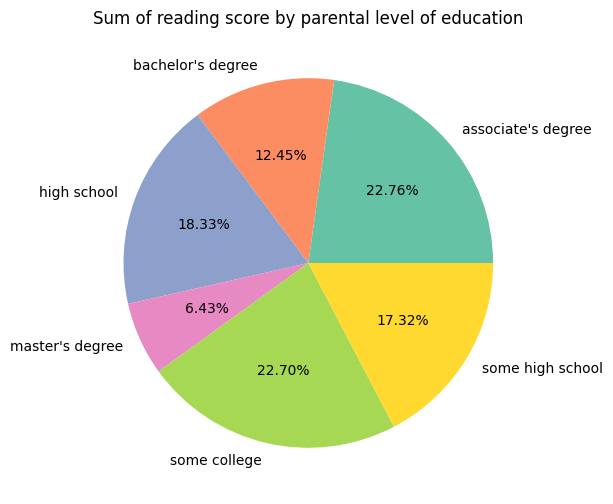

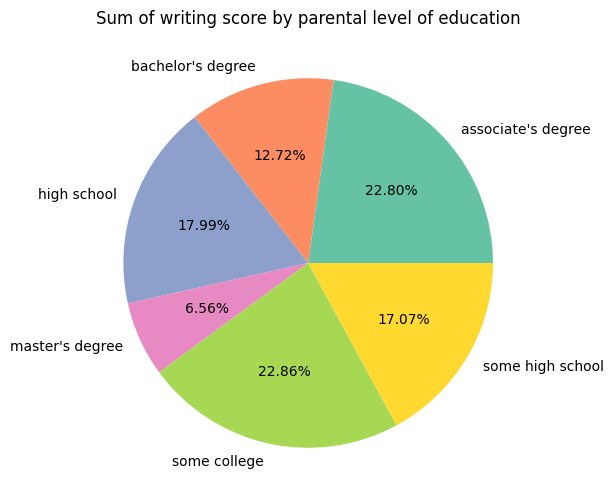

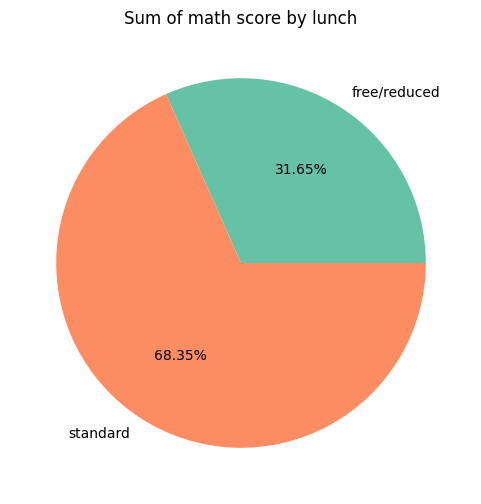

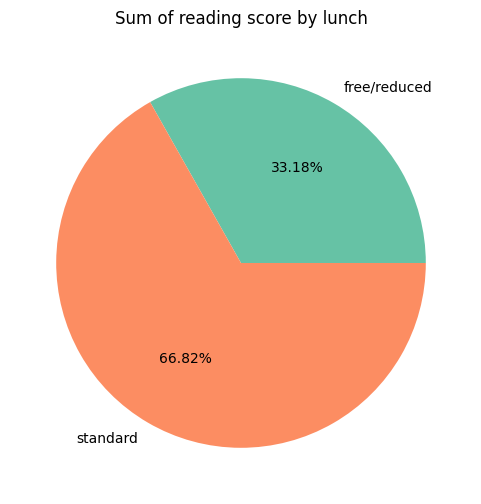

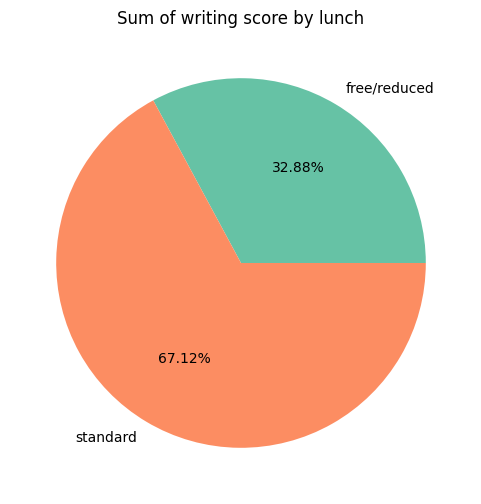

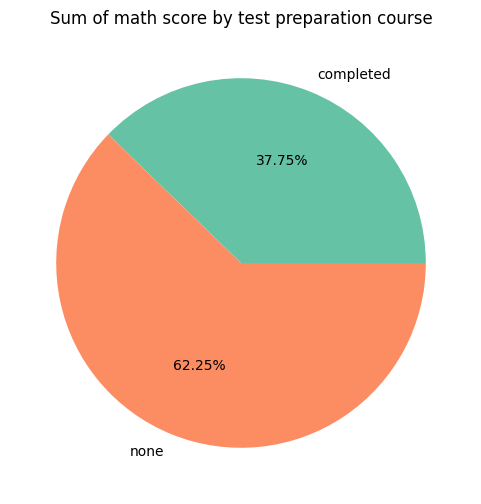

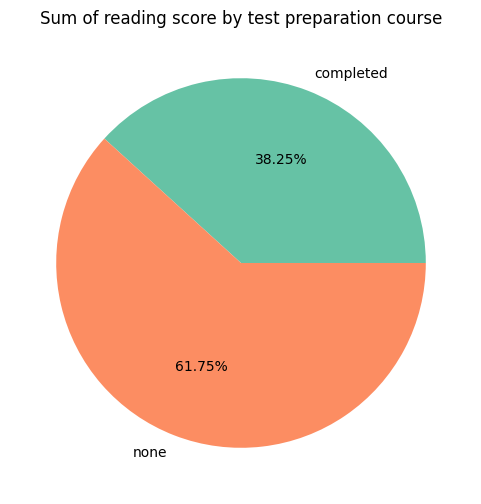

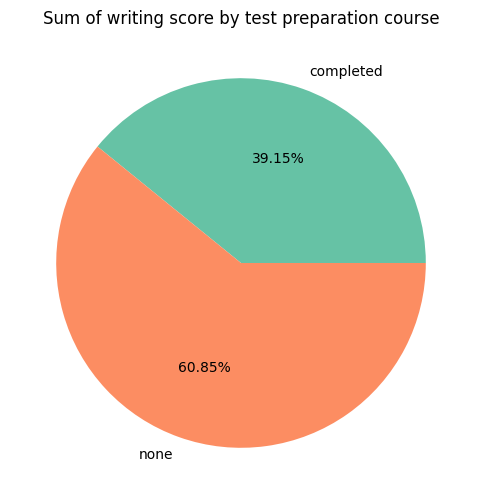

In [237]:
plot_pie_chart_with_palette(df1, cat_features, num_features)

In [238]:
def plot_bar_chart(stud_data, cat_features, num_features):
    for cat_feature in cat_features:
        for num_feature in num_features:
            col_labels, col_data = fetch_data(stud_data, group_column=cat_feature, score_column=num_feature)
            if len(col_data) == 0:
                continue

            plt.figure(figsize=(8,4))
            plt.title(f"Sum of {num_feature} by {cat_feature}")
            sns.barplot(x=col_labels, y=col_data, palette="Set2")
            plt.ylabel(f"Sum of {num_feature}")
            plt.xlabel(cat_feature)
            plt.show()


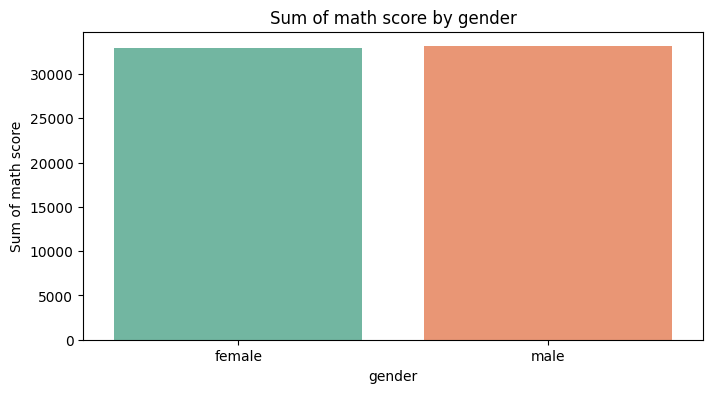

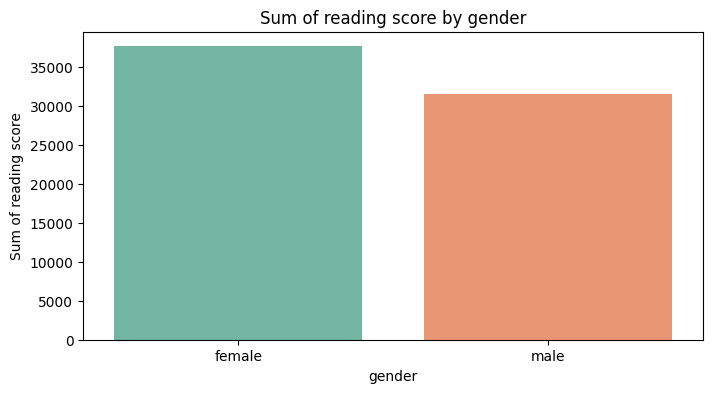

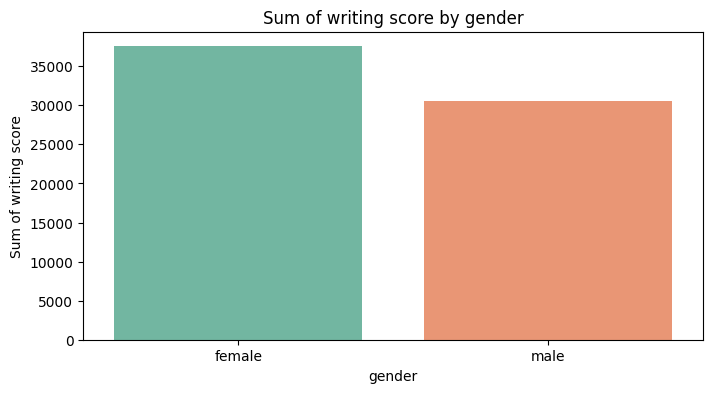

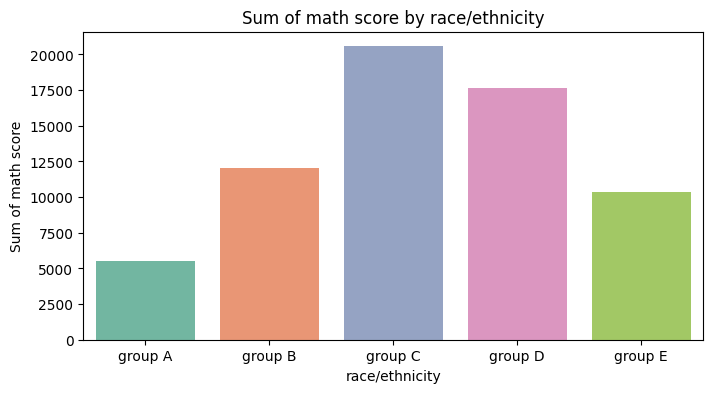

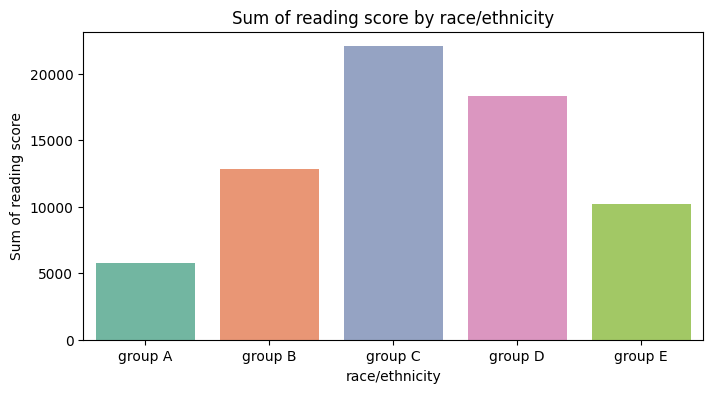

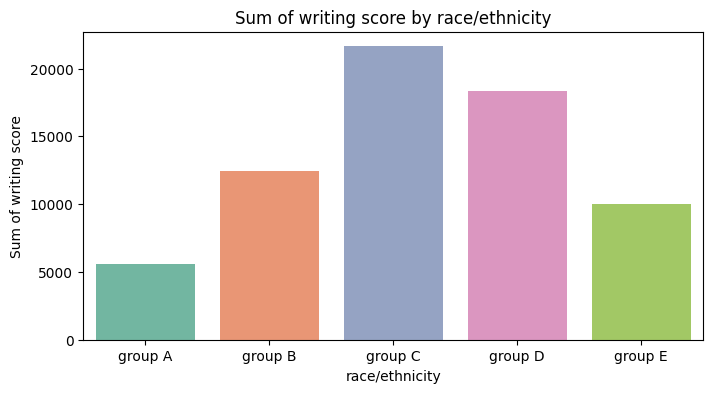

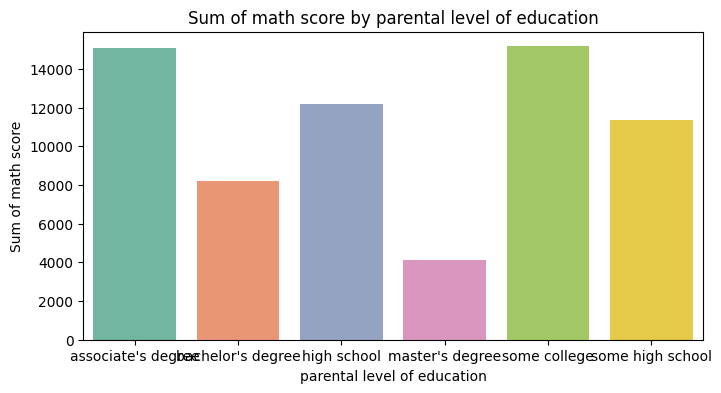

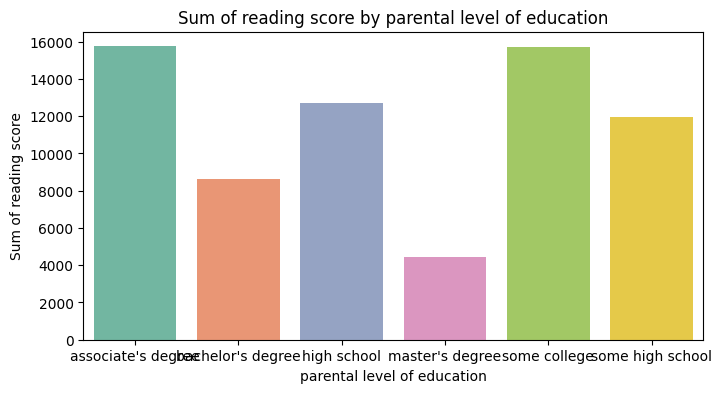

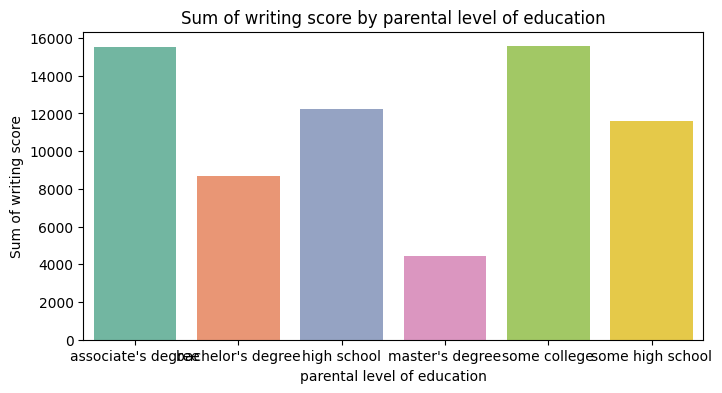

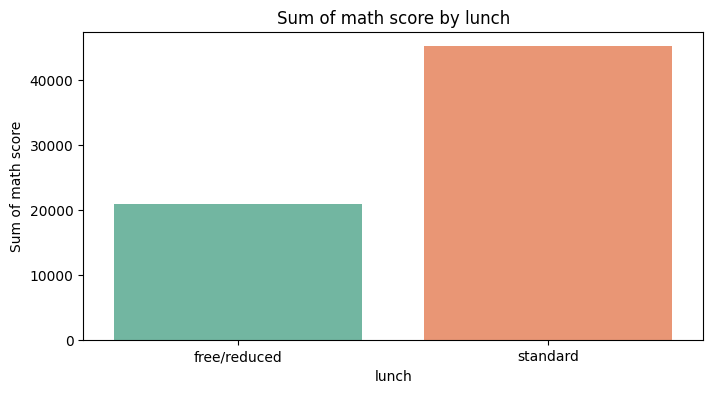

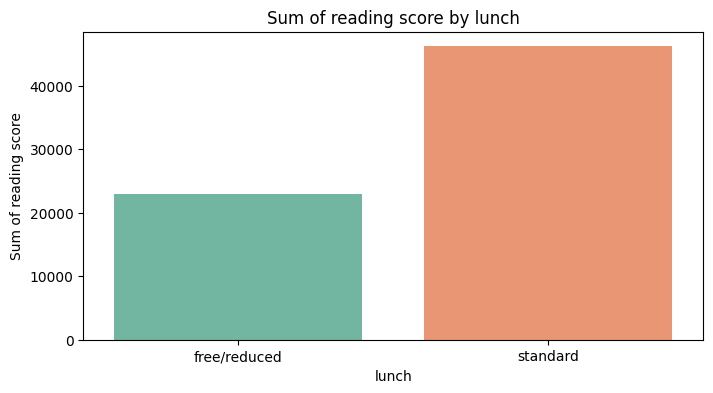

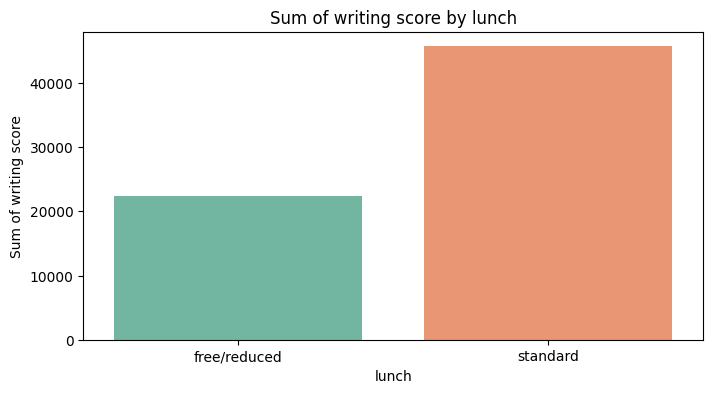

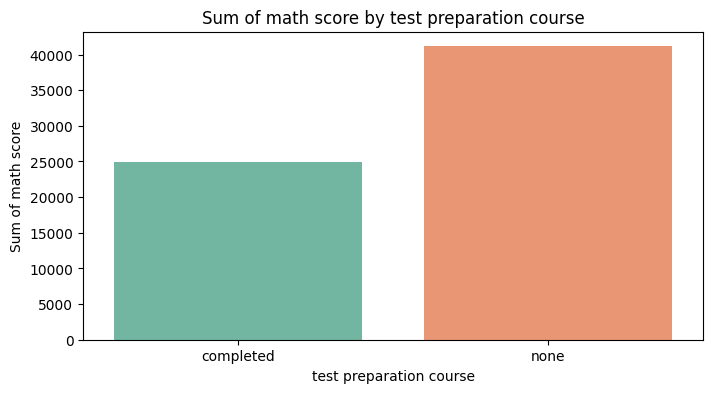

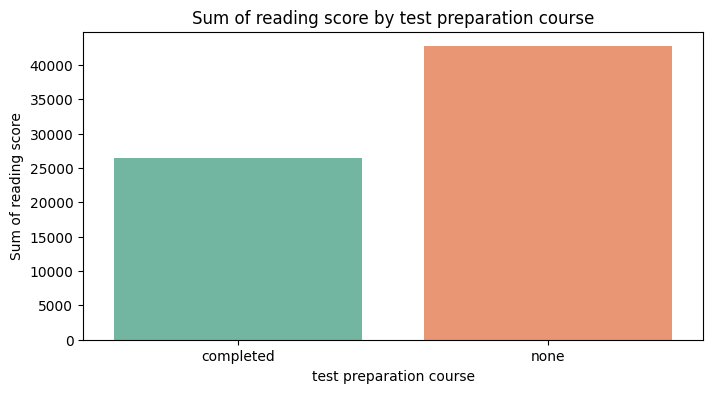

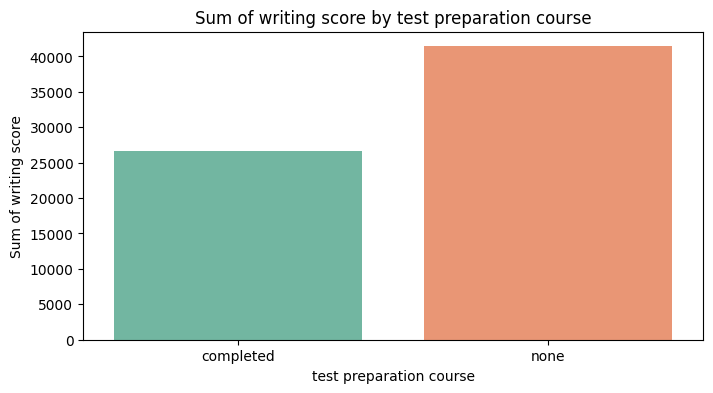

In [239]:
plot_bar_chart(df1, cat_features, num_features)

In [242]:
def plot_bar_chart_with_values(stud_data, cat_features, num_features):
    for cat_feature in cat_features:
        for num_feature in num_features:
            col_labels, col_data = fetch_data(stud_data, group_column=cat_feature, score_column=num_feature)
            if len(col_data) == 0:
                continue

            plt.figure(figsize=(8,4))
            plt.title(f"Sum of {num_feature} by {cat_feature}")
            ax = snb.barplot(x=col_labels, y=col_data, palette="Set2")
            plt.ylabel(f"Sum of {num_feature}")
            plt.xlabel(cat_feature)

            # Add value labels on top of bars
            for p in ax.patches:
                height = p.get_height()
                ax.text(p.get_x() + p.get_width()/2., height, f'{height:.1f}', ha="center", va="bottom")

            plt.show()


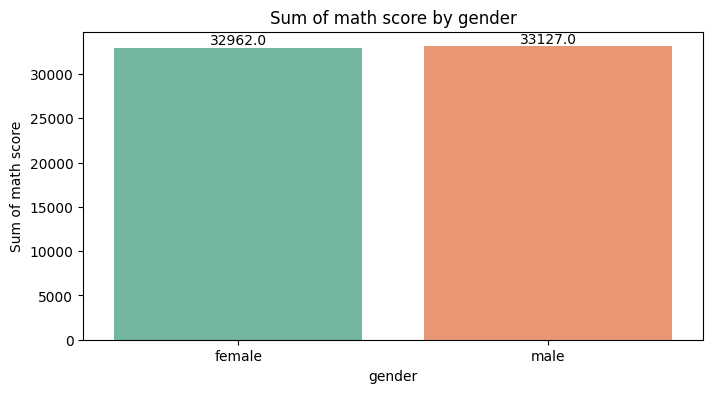

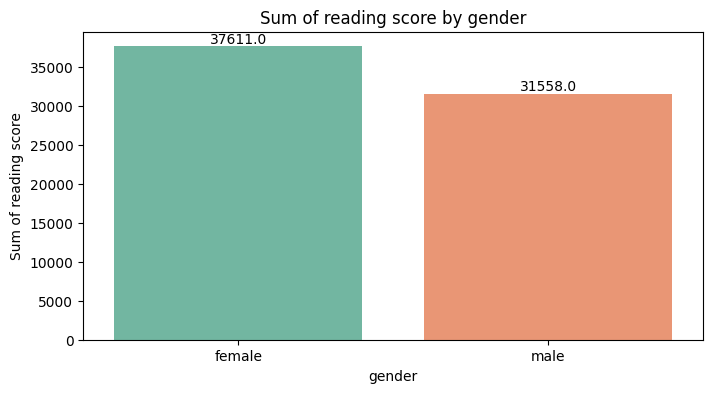

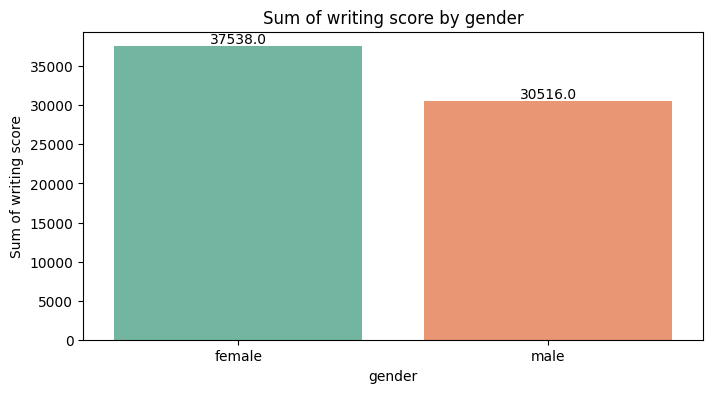

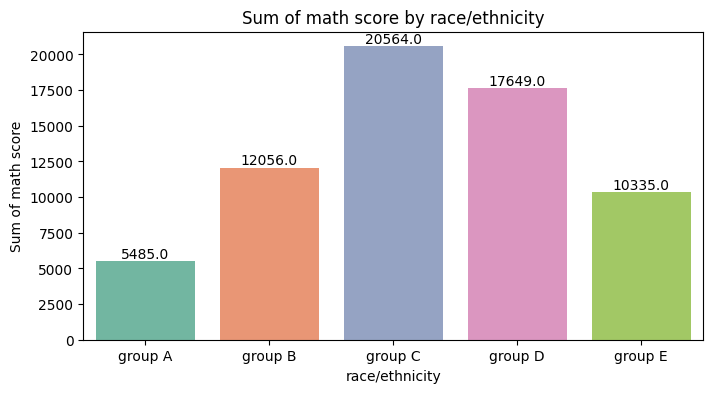

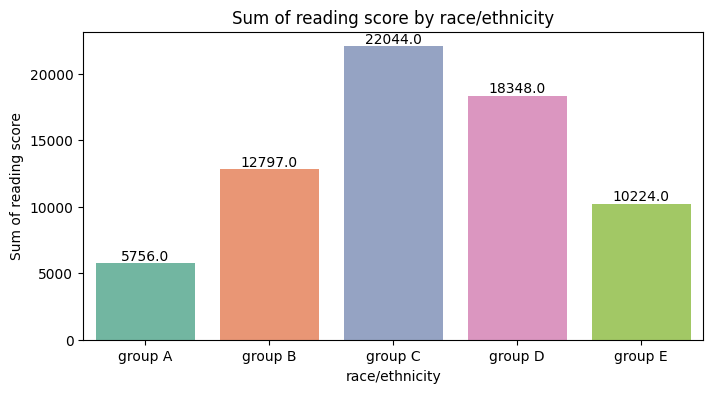

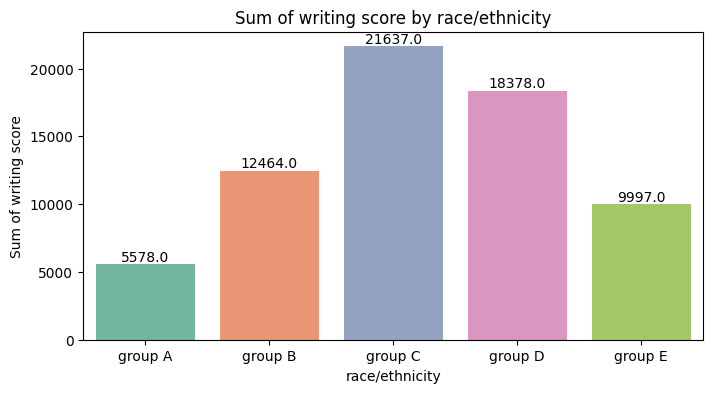

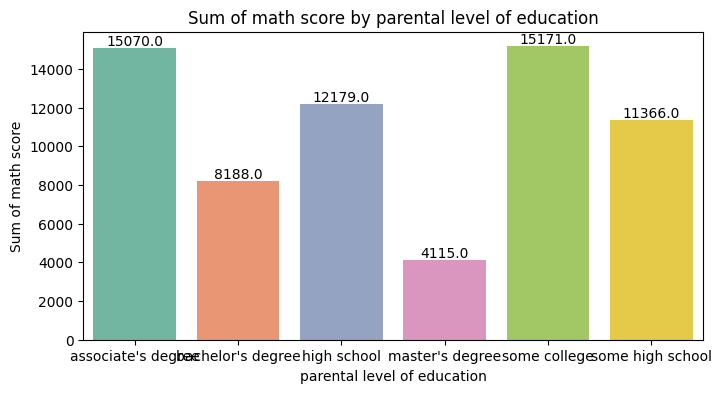

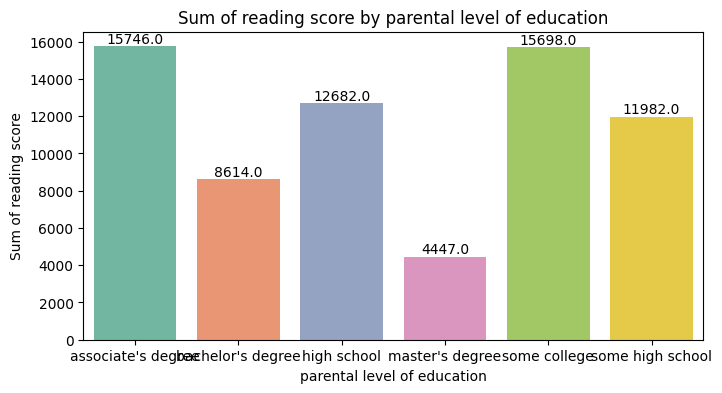

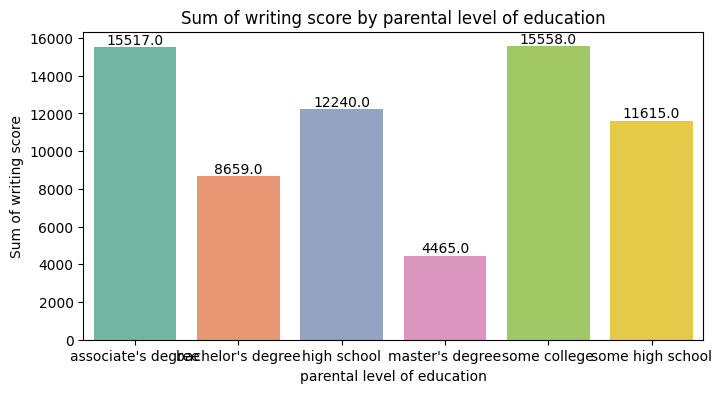

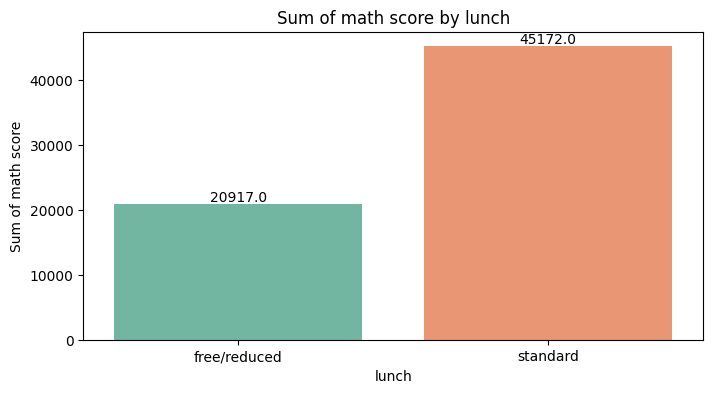

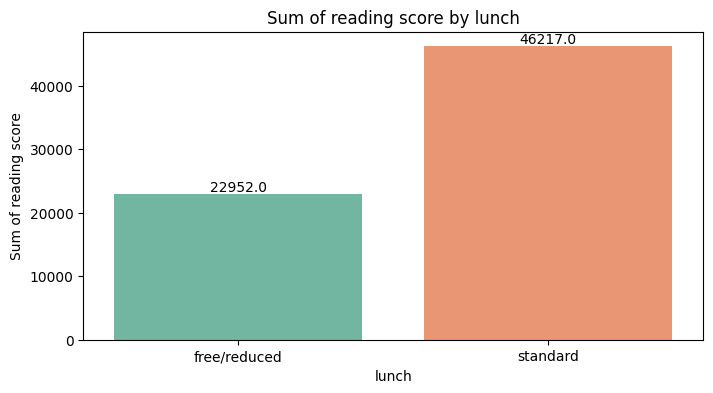

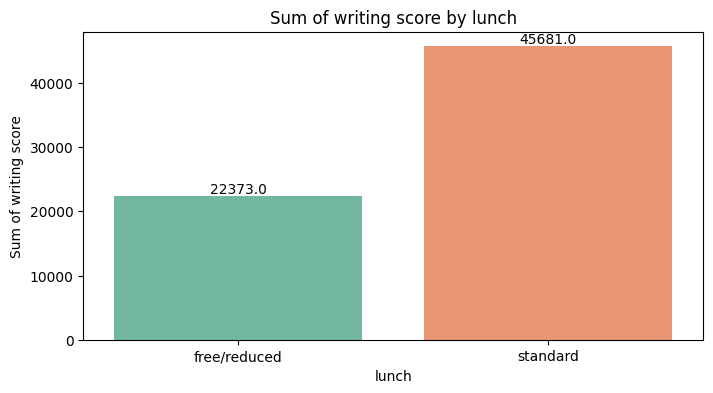

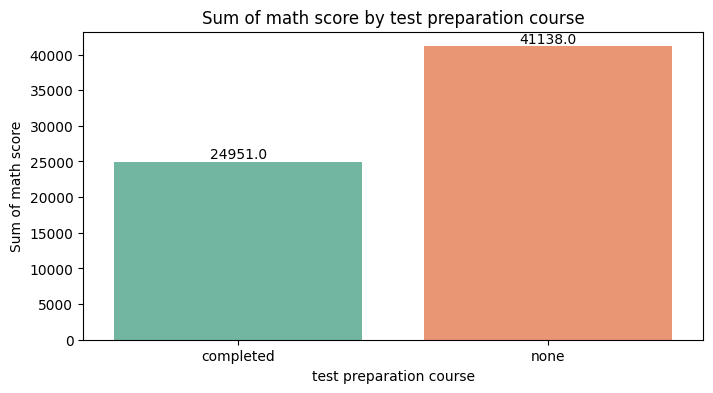

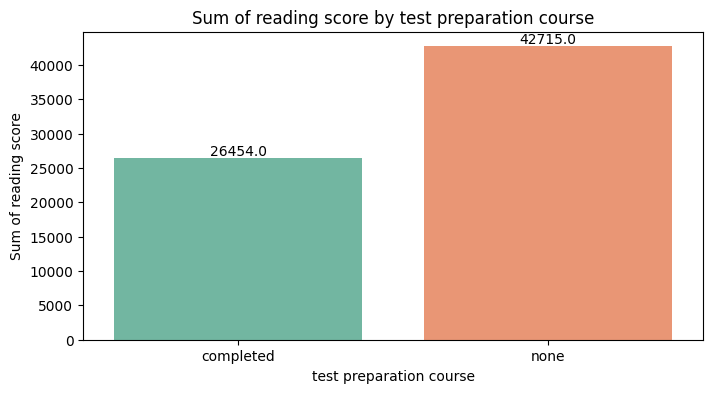

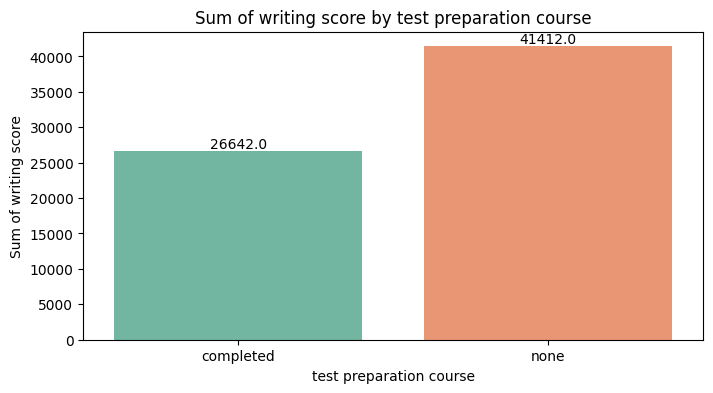

In [243]:
plot_bar_chart_with_values(df1, cat_features, num_features)

In [244]:
def plot_horizontal_bar_chart(stud_data, cat_features, num_features):
    for cat_feature in cat_features:
        for num_feature in num_features:
            col_labels, col_data = fetch_data(stud_data, group_column=cat_feature, score_column=num_feature)
            if len(col_data) == 0:
                continue

            plt.figure(figsize=(8,5))
            plt.title(f"Sum of {num_feature} by {cat_feature}")
            ax = snb.barplot(y=col_labels, x=col_data, palette="Set2", orient='h')
            plt.xlabel(f"Sum of {num_feature}")
            plt.ylabel(cat_feature)

            # Add value labels to bars
            for p in ax.patches:
                width = p.get_width()
                ax.text(width + max(col_data)*0.01, p.get_y() + p.get_height()/2., f'{width:.1f}', va='center')

            plt.show()


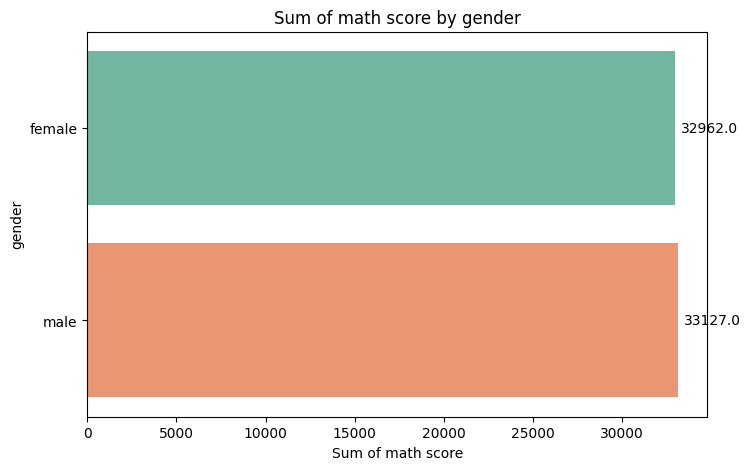

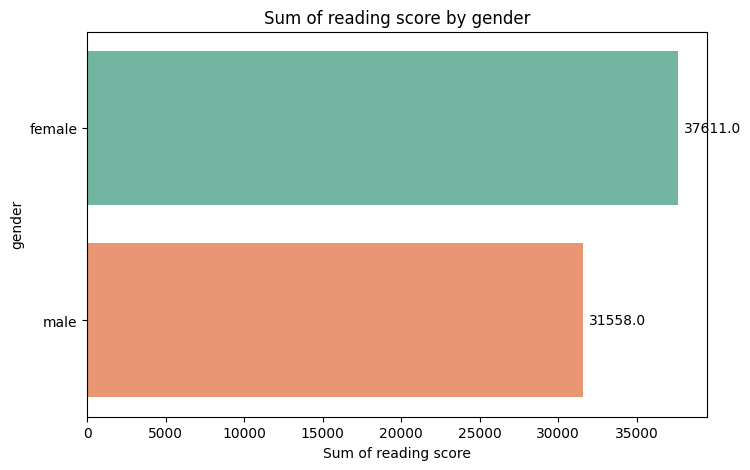

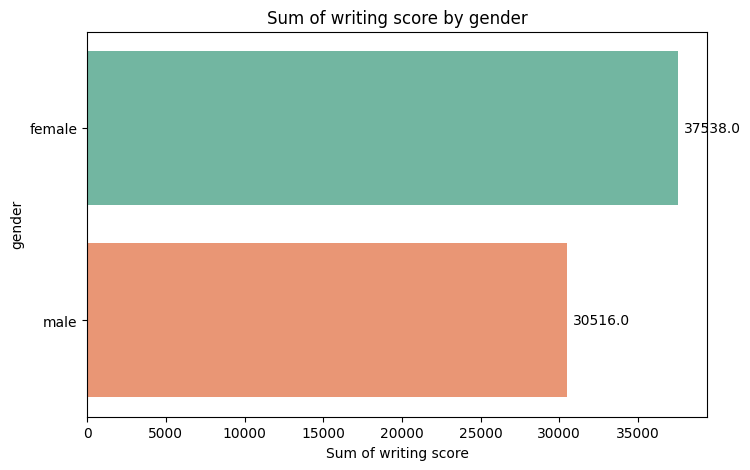

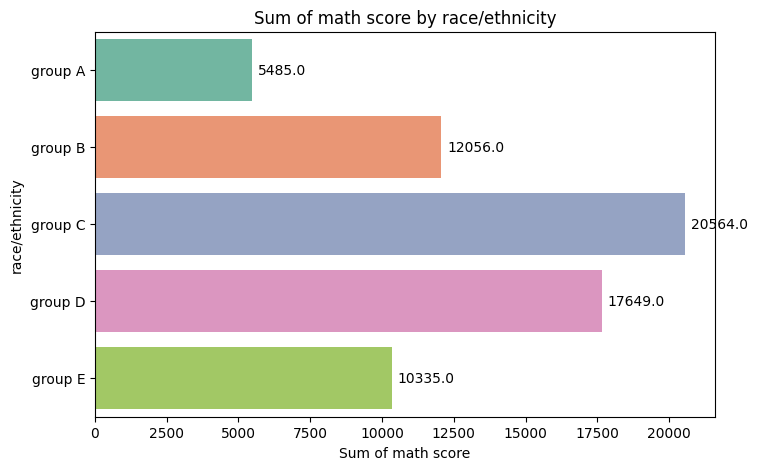

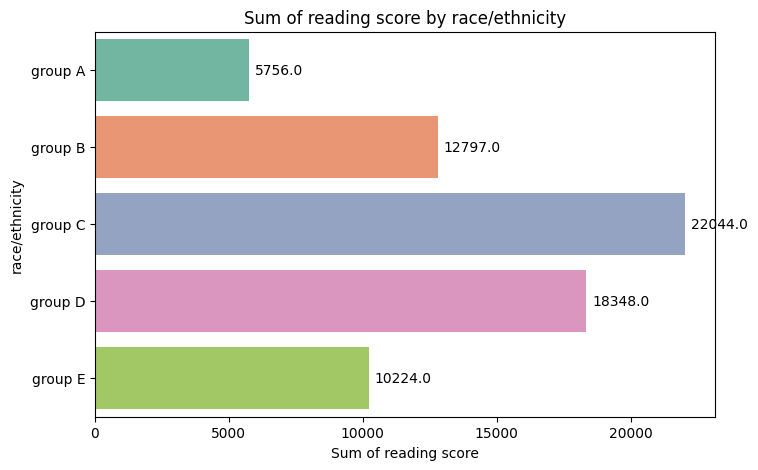

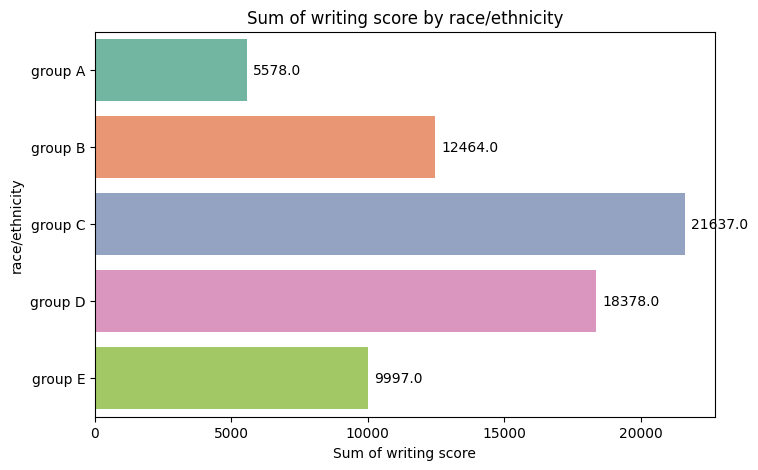

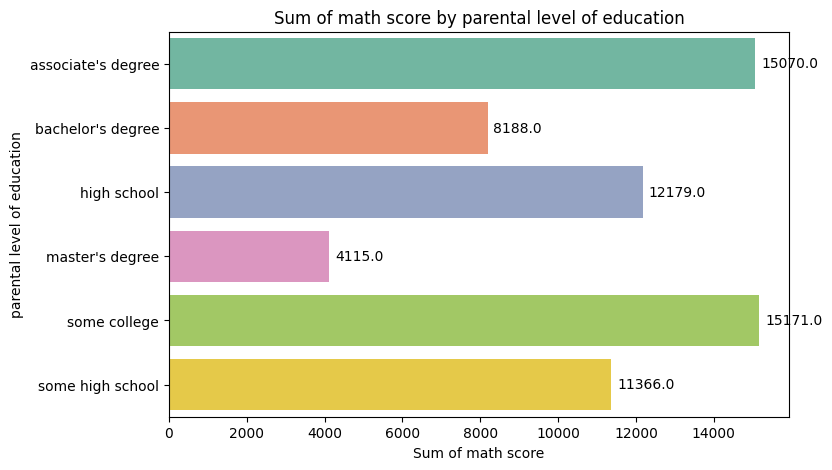

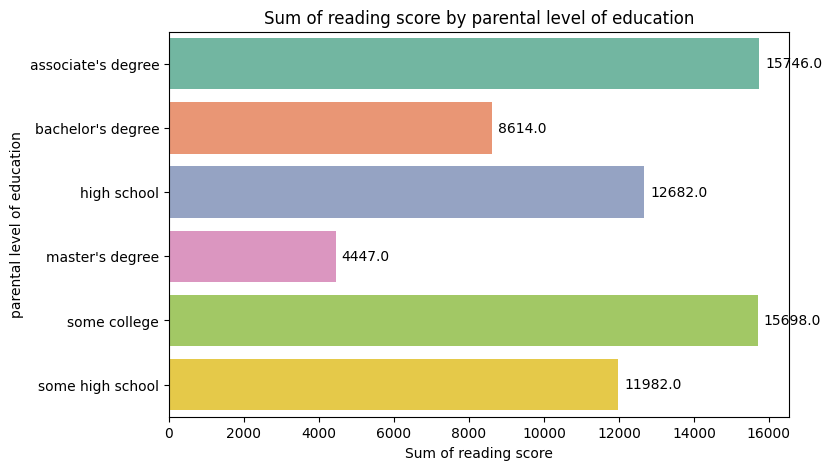

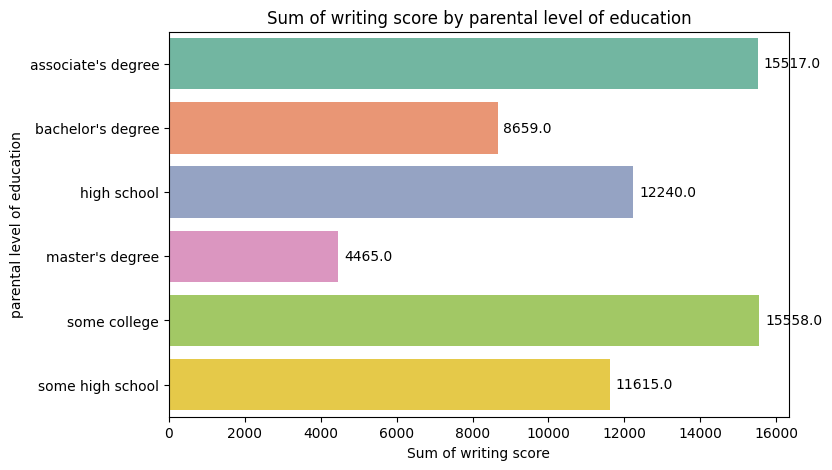

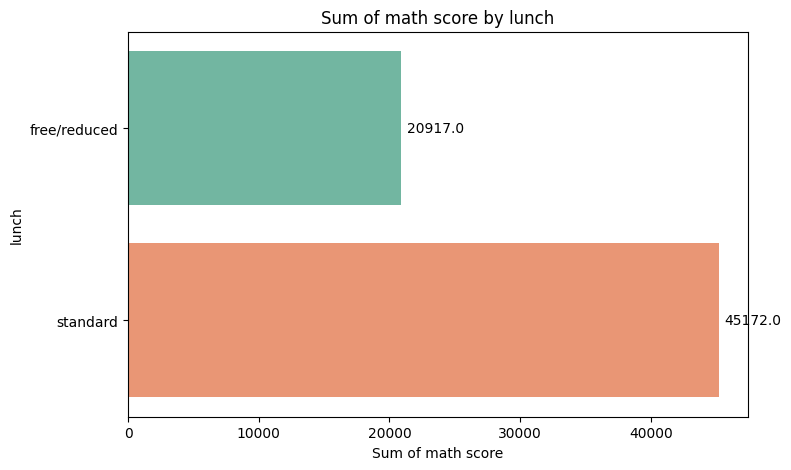

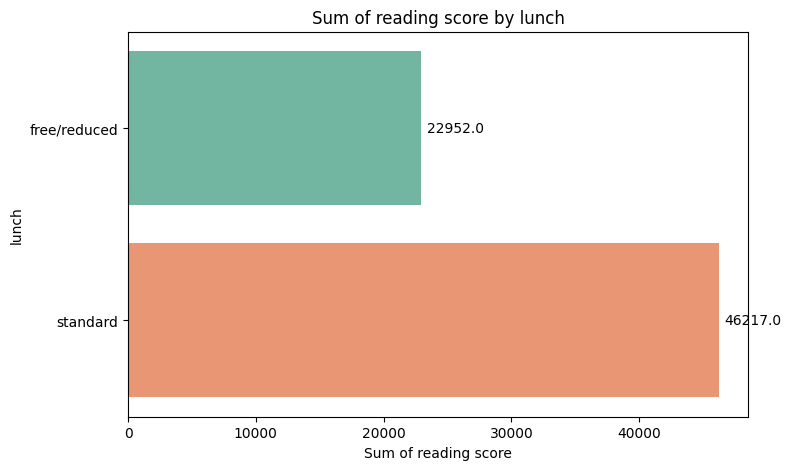

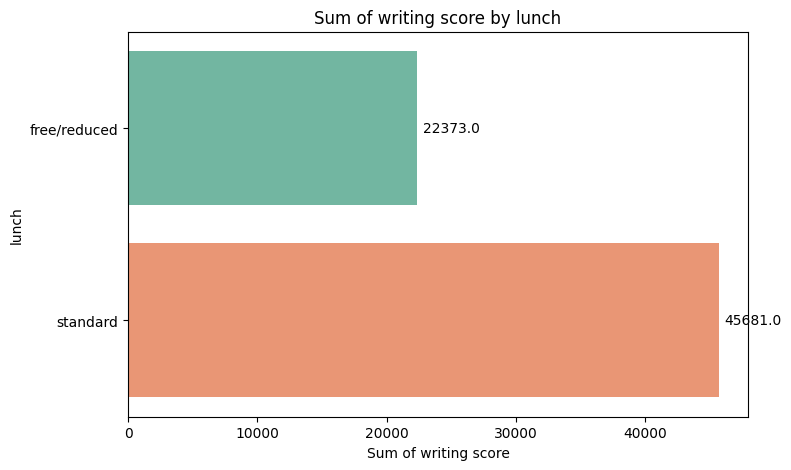

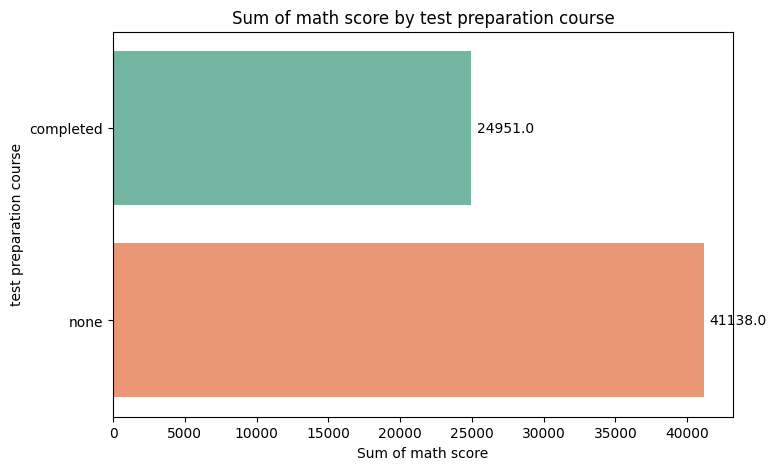

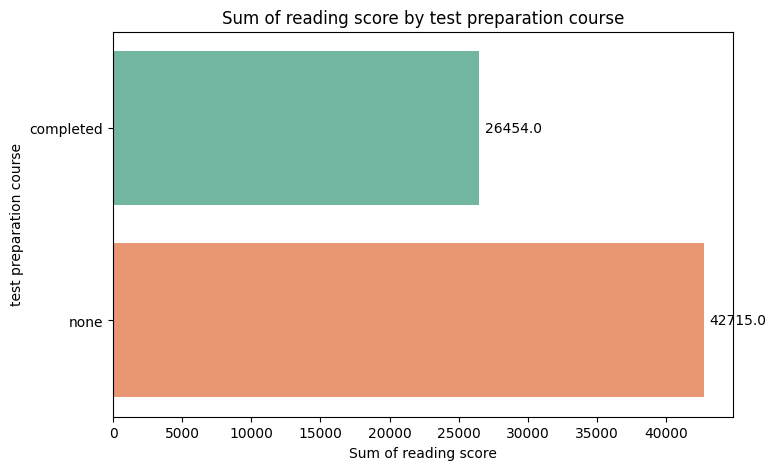

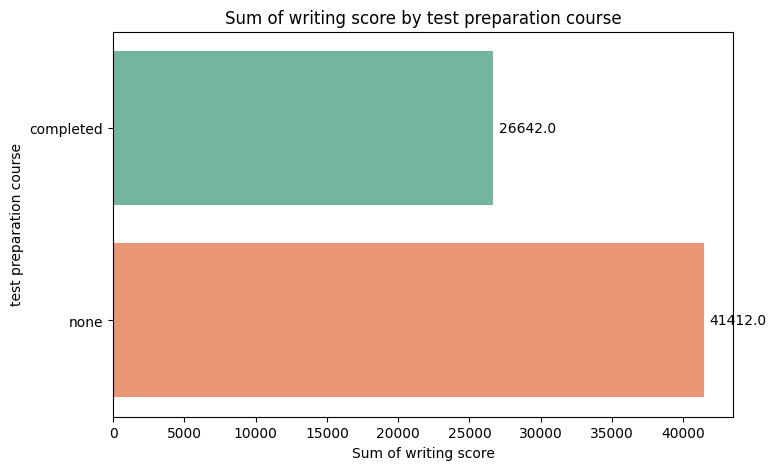

In [245]:
plot_horizontal_bar_chart(df1, cat_features, num_features)